In [20]:
import numpy as np
from shapely.geometry.polygon import LinearRing, Polygon
from shapely.geometry import Point
import random
from shapely import affinity
import matplotlib.pyplot as plt
%matplotlib notebook

In [21]:
class Room():        
    def __init__(self, shape):
        self.shape = shape
        self.polygon = Polygon(np.array(shape, dtype=np.float64))

In [22]:
class FurnitureItem(): 
    def __init__(self, unitcost, shape):
        self.shape = shape
        self.unit_cost = unitcost
        self.polygon = Polygon(np.array(shape, dtype=np.float64))
        self.total_cost = np.float64((np.float64(self.unit_cost) * self.polygon.area))

In [23]:
class Problem():
    def __init__(self, room, furniture):
        self.room = room
        self.furniture = furniture

In [24]:
problems = []
with open('problems.rfp') as f:
    for line in f:
        furnitureList = []
        problem = line.replace(" ","").split("#")

        room_shape = problem[0].split(":")[1]
        furniture = problem[1].split(";")

        room = Room([tuple(np.float64(i) for i in el.strip('()').split(',')) for el in room_shape.split('),(')])

        for furnitureItem in furniture:
            parse_furniture = furnitureItem.strip().split(":")
            unit_cost = parse_furniture[0]
            shape = [tuple(np.float64(i) for i in el.strip('()').split(',')) for el in parse_furniture[1].split('),(')]
            furnitureItem = FurnitureItem(unit_cost, shape)
            furnitureList.append(furnitureItem)
        problems.append(Problem(room,furnitureList))

In [25]:
def plot(poly):
    x,y = poly.exterior.xy
    plt.plot(x, y, color='#6699cc', alpha=0.7, linewidth=3, solid_capstyle='round', zorder=2)
    plt.show()

In [26]:
len(problems[0].furniture)

94

In [191]:
def random_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)
    return points

In [249]:
solution = []
room_2 = problems[21].room.polygon
shapes = copy.copy(problems[21].furniture)
initial_area = room_2.area
while ((initial_area-room_2.area)/initial_area) < 0.3:
    for j in shapes:
        points = random_points_within(room_2,1)[0]
        polygon = affinity.translate(j.polygon, points.x, points.y)
        polygon = affinity.rotate(polygon, random.uniform(0,90),origin="centroid")
        if room_2.contains(polygon):
            room_2 = room_2.difference(polygon)
            x,y = polygon.exterior.xy
            solution.append(list(zip(*(x,y))))
            shapes.remove(j)
            print(len(shapes), (initial_area-room_2.area)/initial_area)
room_2.area

499 0.0027557319223991874
498 0.006283068783069377
497 0.008046737213404471
496 0.011574074074074662
495 0.013337742504409757
494 0.015101410934744852
493 0.016865079365079947
492 0.01862874779541504
491 0.020392416225750137
490 0.02215608465608523
489 0.023919753086420324
488 0.02568342151675542
487 0.027447089947090515
486 0.04332010582010637
485 0.045083774250441466
484 0.046847442680776556
483 0.04861111111111165
482 0.05037477954144675
481 0.05213844797178185
480 0.05919312169312222
479 0.06095679012345732
478 0.06272045855379241
477 0.0644841269841275
476 0.0662477954144626
475 0.0680114638447977
474 0.0697751322751328
473 0.07153880070546789
472 0.07330246913580299
471 0.07506613756613807
470 0.07682980599647317
469 0.07859347442680827
468 0.08035714285714336
467 0.08741181657848374
466 0.09016754850088232
465 0.09193121693121742
464 0.09545855379188761
463 0.09722222222222271
462 0.0989858906525578
461 0.1007495590828929
460 0.10251322751322799
459 0.10526895943562657
458 0.107

396.43750000000034

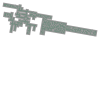

In [250]:
room_2

In [251]:
output = ""
for x in solution:
    output = output + str(x[:-1]).replace('[','').replace(']','') + "; "
print(output)

(20.22198430971244, -5.2911658510024715), (21.20921950664733, -6.057890486013591), (21.975944141658445, -5.070655289078701), (20.988708944723555, -4.303930654067585); (30.209730176021537, -6.517829979436378), (31.942082145156306, -7.517308170811692), (32.441821240843964, -6.651132186244308), (30.709469271709196, -5.65165399486899); (14.800190028832137, -4.030030919368125), (13.904872410800895, -4.475459210839228), (14.350300702272001, -5.3707768288704685), (15.24561832030324, -4.925348537399365); (23.44690689881628, -3.513948437479229), (21.948124419039406, -4.838203351879731), (22.61025187623966, -5.587594591768166), (24.109034356016533, -4.263339677367664); (20.181348986935784, -8.964303217751805), (20.785803959781216, -8.167663910535278), (19.98916465256469, -7.563208937689845), (19.384709679719258, -8.359848244906372); (18.34752199897234, -2.5274545223929614), (17.521774438111393, -1.9634146605638545), (16.957734576282288, -2.7891622214247977), (17.783482137143235, -3.3532020832539